In [14]:
import geopandas as gpd
import altair as alt

In [15]:
file_in = r"D:\Projects\Pr\3941.10\Toeleveringen\waterwijk.dbf"

In [16]:
gdf = gpd.read_file(file_in)
gdf = gdf.iloc[[0,2,3,4]]
gdf.head()
gdf.loc[:,'upperboundary'] = None
gdf.loc[:,'lowerboundary'] = None

In [17]:
gdf.at[0,'upperboundary'] = 0.1
gdf.at[0,'lowerboundary'] = 0.00234
gdf.at[2,'upperboundary'] = 0.00234
gdf.at[2,'lowerboundary'] = 0.000694
gdf.at[3,'upperboundary'] = 0.000694
gdf.at[3,'lowerboundary'] = 0.000112
gdf.at[4,'upperboundary'] = 0.000112
gdf.at[4,'lowerboundary'] = 0.000001

In [22]:
gdf = gdf[['lowerboundary','upperboundary','DIEPTE']]
gdf.columns = ['lowerboundary','upperboundary','class']

In [18]:
gdf.head()

,GM_CODE,GM_NAAM,WK_CODE,BUCODE,BU_NAAM,MEDIAN,KLASSE,DREMPEL,BIJDRAGE,KANS,MEDIAAN,DIEPTE,INTERVAL,geometry,upperboundary,lowerboundary
0,0995,Lelystad,099544,BU09954420,Waterwijk,0,0,-1,0.007938,0.1000,0.100000,Geen significante overstroming,geen overstroming,None,0.1,0.00234
2,0995,Lelystad,099544,BU09954420,Waterwijk,15445000,3,20,0.270427,0.0020,0.001545,waterdiepte > 20,"geen overstroming, 20-50, 50-200, >200",None,0.00234,0.000694
3,0995,Lelystad,099544,BU09954420,Waterwijk,5824000,3,50,0.269902,0.0010,0.000582,waterdiepte > 50,"geen overstroming, 20-50, 50-200, >200",None,0.000694,0.000112
4,0995,Lelystad,099544,BU09954420,Waterwijk,1121500,3,200,0.181306,0.0001,0.000112,waterdiepte > 200,"geen overstroming, 20-50, 50-200, >200",None,0.000112,1e-06


In [24]:
chart = alt.Chart(gdf)

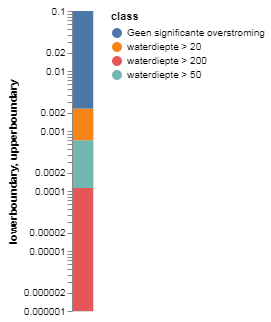

In [25]:
chart.mark_rect().encode(    
    y=alt.Y('lowerboundary', scale = alt.Scale(type="log")),
    y2 = 'upperboundary',
    color ='class'
)

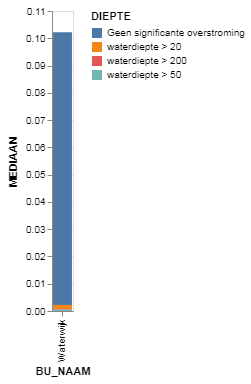

In [22]:
alt.Chart(gdf).mark_bar().encode(
    x='BU_NAAM',
    y=alt.Y('MEDIAAN', scale = alt.Scale(type="linear")),
    color='DIEPTE'
)